<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:black;
           font-size:140%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 20px; color:white; text-align:center"><b> Amazon Food Reviews NLP </b></h3>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import export_text, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from wordcloud import WordCloud

from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk import download

from tqdm.notebook import tqdm
from collections import Counter
from prettytable import PrettyTable
from scipy.stats import loguniform
from scipy.sparse import hstack, vstack
from numpy import where

from imblearn.over_sampling import SMOTE

from wordcloud import WordCloud

# Assuming you are using NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from scipy.stats import loguniform

# Download NLTK resources (if not already downloaded)
download('stopwords')
download('vader_lexicon')
download('wordnet')


[nltk_data] Downloading package stopwords to /home/sujon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sujon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sujon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
nltk.download('stopwords')
'''
The command "nltk.download('punkt')" is used in the NLTK (Natural Language 
Toolkit) library for Python to download the Punkt tokenizer models. 
'''
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/sujon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sujon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df=pd.read_csv("reviews.csv")

In [4]:
df=df[:24225]

In [5]:
df.sample(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
13801,13802,B0017U7TFG,A1DVIW06QACDQI,M. E. Kelly,0,0,4,1281225600,"Yummy, easy vegan lunch",I like just about all the Dr. McDougall foods....
7874,7875,B000G17Y9I,A1GQAKL9CGQLP1,L. M. Keefer,0,0,5,1325635200,Great Shape for Dipping!,"If you're looking for a healthy, natural torti..."
8172,8173,B000E1588O,AF8YVKT5YCBMG,NC Mom,0,0,1,1324425600,Very disappointing,This tea was not what I expected. I love cinn...
12571,12572,B001PNYKLG,A3RXKR5X954ATO,Raymond L. Payne,0,0,5,1326844800,Great Pistachio Oil,Ordered the La Tourangelle Roasted Pistachio O...
738,739,B001HTKZ5S,A1USXH72S0TD4B,Michelle M. White,0,0,1,1287100800,Worst Frosting Ever,This product was such a disappointment! As al...
14866,14867,B000DZKKKM,A1HKBX2L0DV258,Dena Leasure,0,0,3,1264982400,Glutin-free cookies,"These cookies were better than the lemon ones,..."
12783,12784,B0030MNHEG,A1NKVE3T74YBEP,"zman ""zman""",0,0,5,1340323200,the best,this sauce is perfect if you like spicy sauce....
16519,16520,B000UA0QK4,AG5NH29SNT8GK,"Richard Schweitz ""Richard S""",4,7,1,1256515200,Terrible Customer Service,The product was good but the service was slow....
22039,22040,B000KV61FC,A4KHFSEQ0FG95,Franziska Rauch,0,0,3,1279929600,too scary for my dog,"I was all excited to find a toy that my smart,..."
15305,15306,B00503DP0O,APP5MBH2BSX6I,"Brian Hulett ""okierazorbacker2""",0,0,4,1312329600,Recommend you give it a try!,"Some of these ""healthy"" snack products taste l..."


In [6]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24225 entries, 0 to 24224
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      24225 non-null  int64 
 1   ProductId               24225 non-null  object
 2   UserId                  24225 non-null  object
 3   ProfileName             24225 non-null  object
 4   HelpfulnessNumerator    24225 non-null  int64 
 5   HelpfulnessDenominator  24225 non-null  int64 
 6   Score                   24225 non-null  int64 
 7   Time                    24225 non-null  int64 
 8   Summary                 24225 non-null  object
 9   Text                    24225 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [8]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,24225.000000,24225.000000,24225.000000,24225.000000,2.422500e+04
mean,12113.000000,1.559216,2.018122,4.145593,1.294276e+09
std,6993.299472,5.433758,6.076377,1.313410,4.705317e+07
min,1.000000,0.000000,0.000000,1.000000,9.617184e+08
25%,6057.000000,0.000000,0.000000,4.000000,1.267920e+09
50%,12113.000000,0.000000,1.000000,5.000000,1.307923e+09
75%,18169.000000,1.000000,2.000000,5.000000,1.329610e+09
max,24225.000000,202.000000,219.000000,5.000000,1.351210e+09


In [9]:
df.isnull()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
24220,False,False,False,False,False,False,False,False,False,False
24221,False,False,False,False,False,False,False,False,False,False
24222,False,False,False,False,False,False,False,False,False,False
24223,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().any()

Id                        False
ProductId                 False
UserId                    False
ProfileName               False
HelpfulnessNumerator      False
HelpfulnessDenominator    False
Score                     False
Time                      False
Summary                   False
Text                      False
dtype: bool

In [11]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [12]:
# There is some missing value detected .
# To resolve the essentaintial
df.fillna("",inplace=True)

In [13]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [14]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
24220,24221,B0013NUGDE,A3V1A3C9DTLPME,Peter Faden,1,1,5,1327881600,Light and delicious,These are little airy and delicious nuggets of...
24221,24222,B0013NUGDE,A1GYEGLX3P2Y7P,Shala Kerrigan,1,1,4,1327881600,Great crispy crunch and flavor,"My family is addicted to crispy, salty snacks ..."
24222,24223,B0013NUGDE,A3NZVCL9N8CLHB,"Leo ""Katphish""",1,1,5,1327536000,Addictive!,I've never been a big fan on chips. When it co...
24223,24224,B0013NUGDE,A41MKHZQ85J9U,"Gr8ful ""Love a good book""",1,1,4,1327536000,Delicious,I really liked these. Great snack for someone...


In [15]:
unique_value=df.nunique()

In [16]:
print("Unique values per column:\n", unique_value)

Unique values per column:
 Id                        24225
ProductId                  2987
UserId                    21083
ProfileName               19866
HelpfulnessNumerator         87
HelpfulnessDenominator       93
Score                         5
Time                       2280
Summary                   20328
Text                      23419
dtype: int64


# EDA

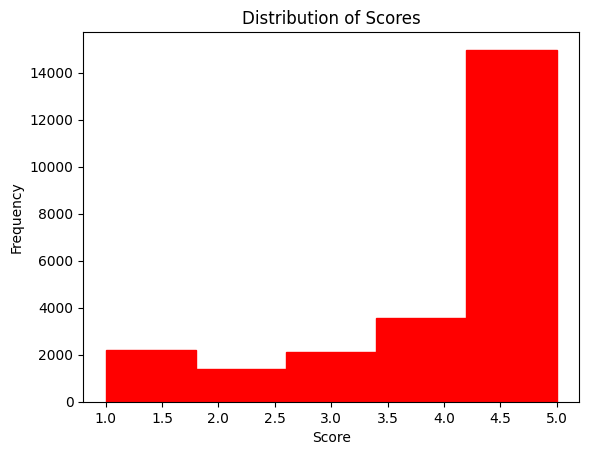

In [17]:
# plt.hist(df['Score'], bins=5, edgecolor='black')
# plt.title('Distribution of Scores')
# plt.xlabel('Score')
# plt.ylabel('Frequency')
# plt.show()
plt.hist(df['Score'],bins=5, edgecolor='red',color='red')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [18]:
df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']


In [19]:
df['Time'] = pd.to_datetime(df['Time'], unit='s')


In [20]:
top_reviewers = df['UserId'].value_counts().head(10)
print("Top Reviewers:\n", top_reviewers)


Top Reviewers:
 A1Z54EM24Y40LL    24
AY12DBB0U420B     17
A3OXHLG6DIBRW8    17
A2SZLNSI5KOQJT    17
A1YUL9PCJR3JTY    12
A1TMAVN4CEM8U8    11
A2PNOU7NXB1JE4    11
A3PJZ8TU8FDQ1K    11
A281NPSIMI1C2R    10
A2R6RA8FRBS608    10
Name: UserId, dtype: int64


In [21]:
# Analysis of Helpfulness Ratio:

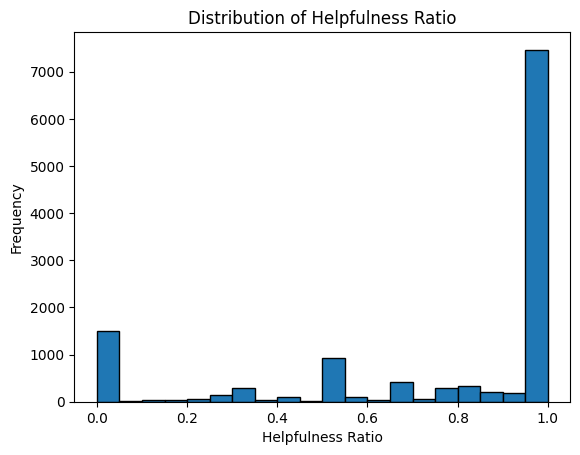

In [22]:
plt.hist(df['HelpfulnessRatio'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution of Helpfulness Ratio')
plt.xlabel('Helpfulness Ratio')
plt.ylabel('Frequency')
plt.show()


In [23]:
# Text Length Analysis:

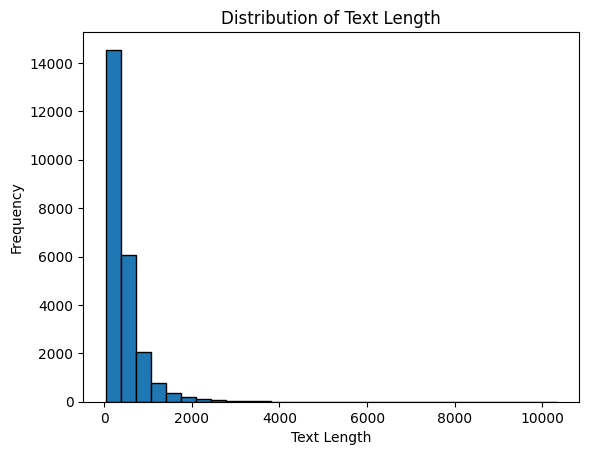

In [24]:
df['TextLength'] = df['Text'].apply(len)
plt.hist(df['TextLength'], bins=30, edgecolor='black')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


In [25]:
# Score vs. Helpfulness:

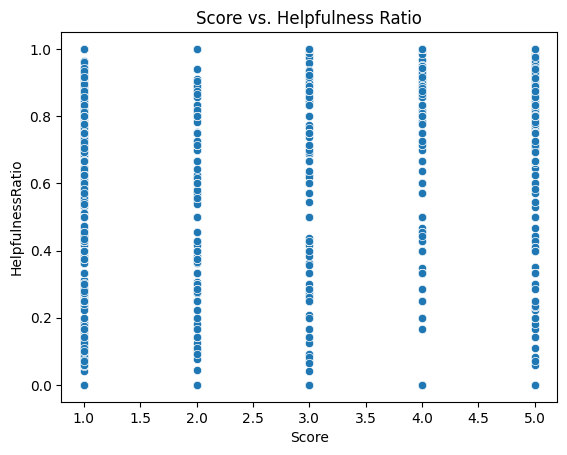

In [26]:
sns.scatterplot(x='Score', y='HelpfulnessRatio', data=df)
plt.title('Score vs. Helpfulness Ratio')
plt.show()


In [27]:
# Top Products:

In [28]:
top_products = df['ProductId'].value_counts().head(10)
print("Top Reviewed Products:\n", top_products)

Top Reviewed Products:
 B002QWP89S    632
B000KV61FC    556
B0013NUGDE    537
B003VXFK44    455
B006N3IG4K    455
B001LG945O    347
B001LGGH40    341
B004ZIER34    330
B005K4Q1VI    324
B008ZRKZSM    310
Name: ProductId, dtype: int64


In [29]:
# Top Summary Words:

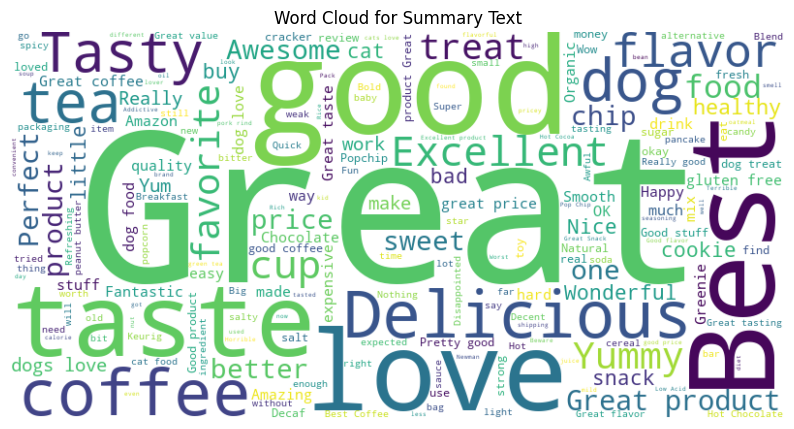

In [30]:
summary_data = ' '.join(df['Summary'].astype(str))
wordcloud_summary = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(summary_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Summary Text')
plt.show()


In [31]:
duplicated_df=df[df.duplicated(subset=['ProductId', 'UserId', 'ProfileName', 'Time', 'Text'],keep=False)]

In [32]:
df.duplicated(subset=['ProductId', 'UserId', 'ProfileName', 'Time', 'Text'], keep=False).value_counts()

False    24143
True        82
dtype: int64

In [33]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Id                            0
ProductId                     0
UserId                        0
ProfileName                   0
HelpfulnessNumerator          0
HelpfulnessDenominator        0
Score                         0
Time                          0
Summary                       0
Text                          0
HelpfulnessRatio          11939
TextLength                    0
dtype: int64


In [34]:
import os

In [35]:
# Drop the duplicates
df.drop_duplicates(subset=['ProductId', 'UserId', 'ProfileName', 'Time', 'Text'], keep='first', inplace=True)
df.shape

(24177, 12)

In [36]:
df[df["HelpfulnessNumerator"] > df["HelpfulnessDenominator"]]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,TextLength


In [37]:
print(f"No. of Datapoints BEFORE discarding : {df.shape[0]}")

df = df[df["HelpfulnessNumerator"] <= df["HelpfulnessDenominator"]]

print(f"No. of Datapoints AFTER discarding : {df.shape[0]}")

No. of Datapoints BEFORE discarding : 24177
No. of Datapoints AFTER discarding : 24177


In [38]:
print("Positive reviews:", df[df['Score']>3].shape[0])
print("Negative reviews:", df[df['Score']<=3].shape[0])

Positive reviews: 18519
Negative reviews: 5658


In [39]:
df['Review'] = [1 if x>3 else 0 for x in df['Score']] 
# set 1 for positive reviews, 0 for negative reviews
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,TextLength,Review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,263,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,190,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,509,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0,219,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,NaN,140,1


In [40]:
df.Score

0        5
1        1
2        4
3        2
4        5
        ..
24220    5
24221    4
24222    5
24223    4
24224    2
Name: Score, Length: 24177, dtype: int64

In [41]:
df['Review']=[1 if x>3 else 0 for x in df['Score']]

In [42]:
review_counts=df.Review.value_counts()
review_counts

1    18519
0     5658
Name: Review, dtype: int64

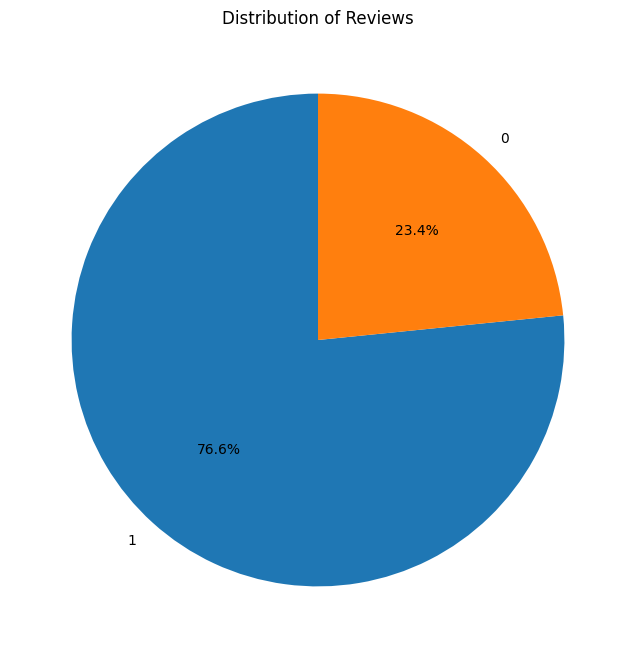

In [43]:
# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Reviews')
plt.show()

In [44]:
# Check negative and positive reviews (1, 2, 3 - negative; 4 and 5 - positive)
print("Negative values with scores 1, 2 and 3:", len(df[df['Review']==0]))
print("Positive values with score 4 and 5:", len(df[df['Review']==1]))

Negative values with scores 1, 2 and 3: 5658
Positive values with score 4 and 5: 18519


In [45]:
## Add word count feature

In [46]:
df['WordCount']=df['Text'].apply(lambda x: len(x.split()))

In [47]:
df.WordCount

0         48
1         31
2         94
3         41
4         27
        ... 
24220     67
24221    213
24222    305
24223     97
24224     83
Name: WordCount, Length: 24177, dtype: int64

In [48]:
# character count
df['CharacterCount'] = df['Text'].apply(lambda x: len(x))
df.CharacterCount

0         263
1         190
2         509
3         219
4         140
         ... 
24220     403
24221    1231
24222    1746
24223     532
24224     435
Name: CharacterCount, Length: 24177, dtype: int64

In [49]:
df["HelpfulnessPercentage"] = df[["HelpfulnessNumerator","HelpfulnessDenominator"]].apply(lambda x: ((x[0]/x[1])*100.0) if x[1] else 0.0, axis=1)
df.head(5)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,TextLength,Review,WordCount,CharacterCount,HelpfulnessPercentage
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,263,1,48,263,100.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,190,0,31,190,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,509,1,94,509,100.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0,219,0,41,219,100.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,NaN,140,1,27,140,0.0


In [50]:
# helpfullness indicator
df.loc[df["HelpfulnessPercentage"] >= 75, 'HelpfulnessIndicator'] = 'Useful'
df.loc[(df["HelpfulnessPercentage"] > 40) & (df["HelpfulnessPercentage"] < 75), 'HelpfulnessIndicator'] = 'Intermediate'
df.loc[(df["HelpfulnessPercentage"] > 0) & (df["HelpfulnessPercentage"] <= 40), 'HelpfulnessIndicator'] = 'Not Useful'
df.loc[df["HelpfulnessPercentage"] == 0, 'HelpfulnessIndicator'] = 'Not Available'
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,TextLength,Review,WordCount,CharacterCount,HelpfulnessPercentage,HelpfulnessIndicator
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,263,1,48,263,100.0,Useful
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,190,0,31,190,0.0,Not Available
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,509,1,94,509,100.0,Useful
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0,219,0,41,219,100.0,Useful
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,NaN,140,1,27,140,0.0,Not Available


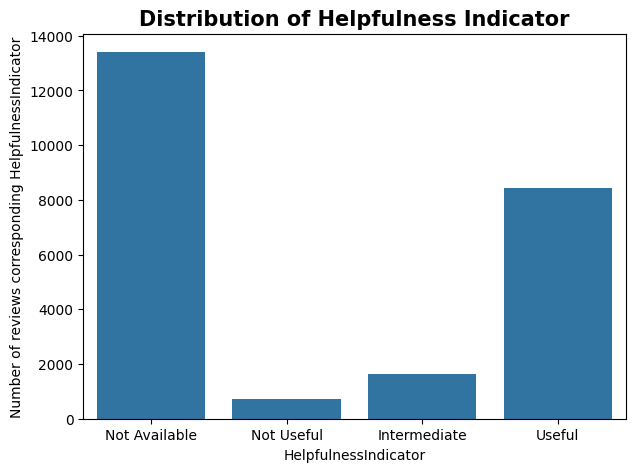

In [51]:
plt.figure(figsize=(7,5))
sns.countplot(df, x='HelpfulnessIndicator', order=["Not Available","Not Useful","Intermediate","Useful"])
plt.title("Distribution of Helpfulness Indicator",fontweight='bold', fontsize=15)
plt.xlabel("HelpfulnessIndicator")
plt.ylabel("Number of reviews corresponding HelpfulnessIndicator")
plt.show()


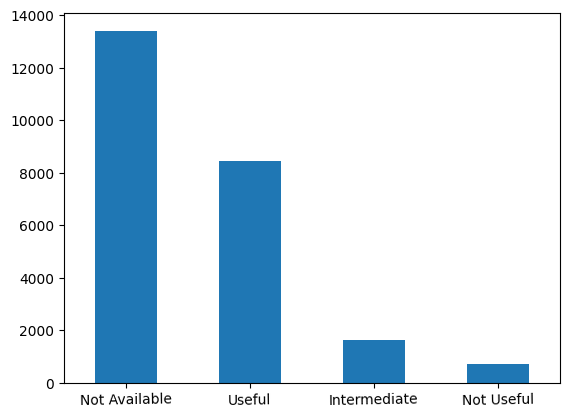


Count of Usefulness of Reviews:
Not Available    13404
Useful            8447
Intermediate      1623
Not Useful         703
Name: HelpfulnessIndicator, dtype: int64


In [52]:
df.HelpfulnessIndicator.value_counts().plot(kind='bar', rot=1.0)
plt.show()
print("\nCount of Usefulness of Reviews:")
print(df.HelpfulnessIndicator.value_counts())

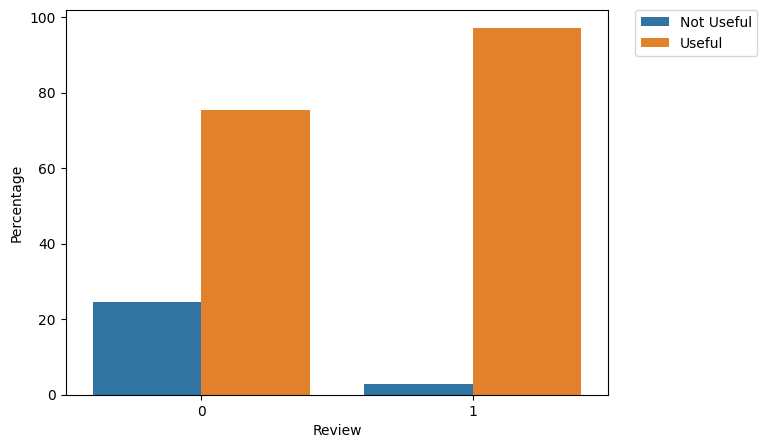

In [53]:
df_temp = df[(df["HelpfulnessIndicator"] != "Not Available") & (df["HelpfulnessIndicator"] != "Intermediate")]
df_temp_1 = df_temp["HelpfulnessIndicator"].groupby(df_temp["Review"]).value_counts(normalize=True)
df_temp_1 = df_temp_1*100
df_temp_1 = df_temp_1.rename("Percentage").reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=df_temp_1, x="Review", y="Percentage", hue="HelpfulnessIndicator", hue_order=["Not Useful","Useful"]);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.show()
print()


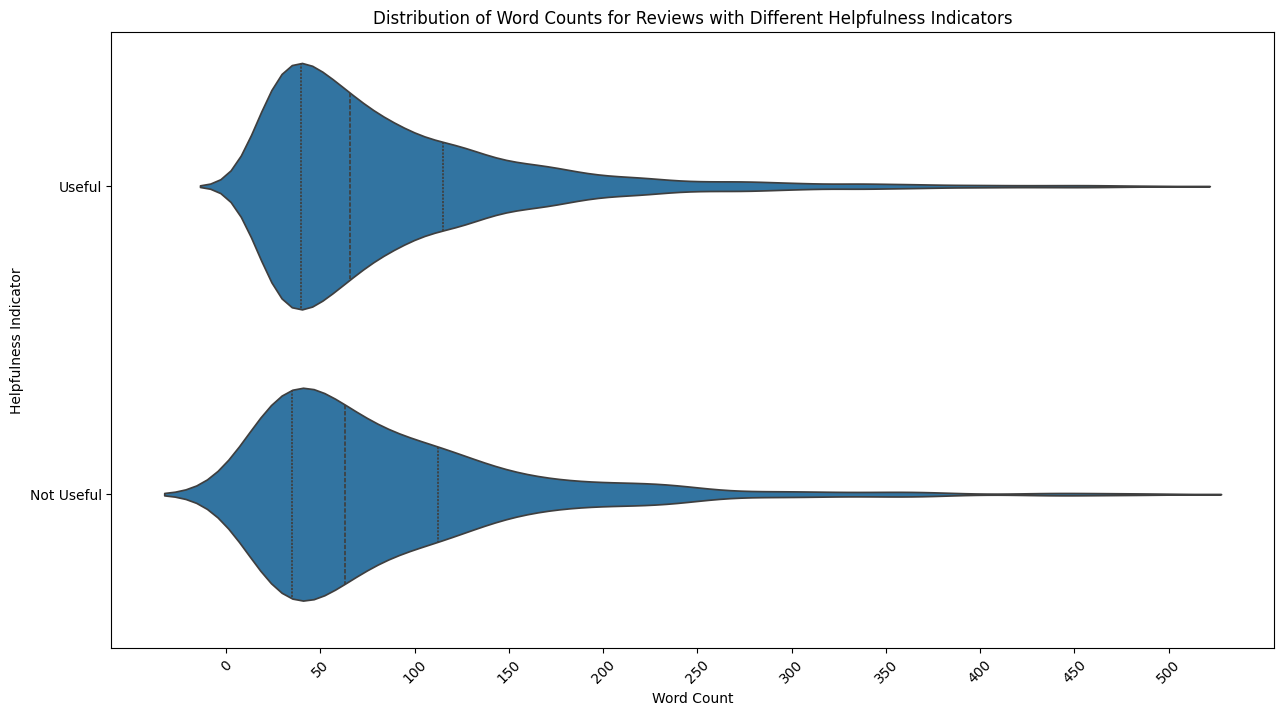

                       count       mean        std   min   25%   50%     75%  \
HelpfulnessIndicator                                                           
Not Useful             696.0  86.801724  73.584255   7.0  35.0  63.0  112.25   
Useful                8400.0  88.839881  72.448274  10.0  40.0  66.0  115.00   

                        max  
HelpfulnessIndicator         
Not Useful            488.0  
Useful                498.0  


In [54]:
# Consider reviews with 500 words or less
temp_df_useful_nonuseful_500wc = df[(df["HelpfulnessIndicator"] != "Not Available") & 
                                     (df["HelpfulnessIndicator"] != "Intermediate") & 
                                     (df["WordCount"] < 500)]

plt.figure(figsize=(15, 8))
sns.violinplot(x='WordCount', y='HelpfulnessIndicator', data=temp_df_useful_nonuseful_500wc, inner="quartile", orient="h")
plt.title('Distribution of Word Counts for Reviews with Different Helpfulness Indicators')
plt.xlabel('Word Count')
plt.ylabel('Helpfulness Indicator')
plt.xticks(range(0, 501, 50), rotation=45)
plt.show()

# Display summary statistics
summary_stats = temp_df_useful_nonuseful_500wc["WordCount"].groupby(temp_df_useful_nonuseful_500wc["HelpfulnessIndicator"]).describe()
print(summary_stats)


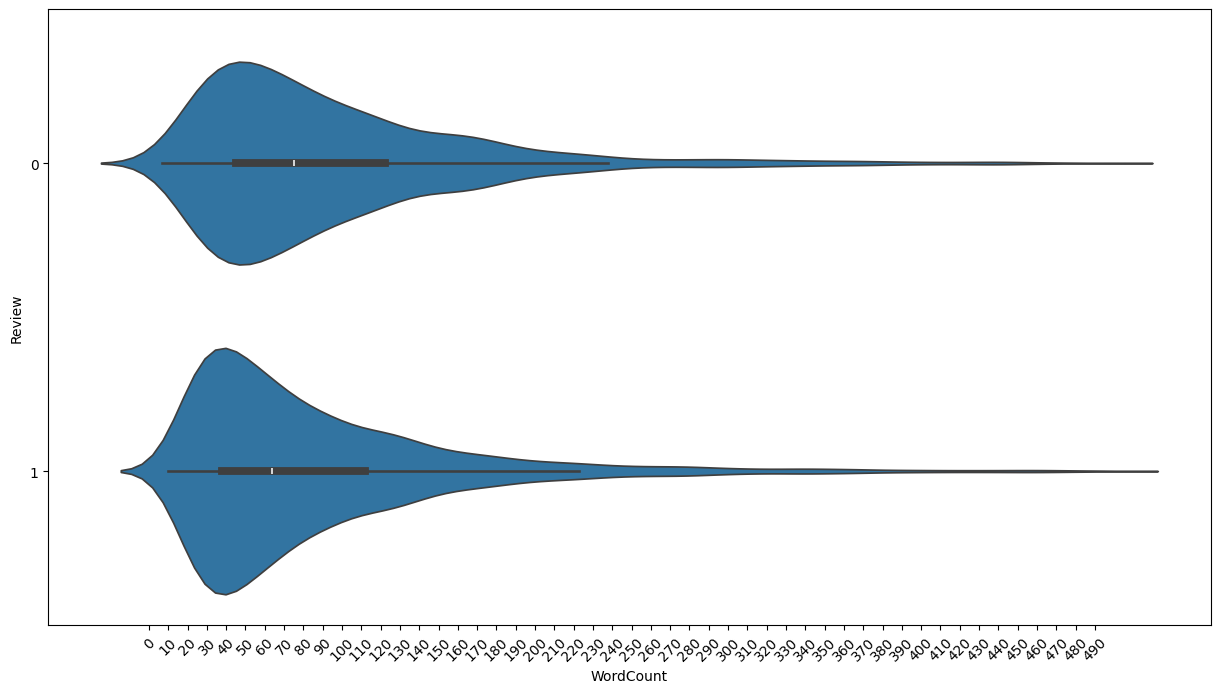

,count,mean,std,min,25%,50%,75%,max
Review,,,,,,,,
0,2008.0,95.430279,72.809538,7.0,45.0,75.0,122.25,488.0
1,7088.0,86.772714,72.346304,10.0,38.0,64.0,112.00,498.0


In [55]:
plt.figure(figsize=(15,8))
sns.violinplot(x='WordCount', y='Review', data=temp_df_useful_nonuseful_500wc, orient="h")
plt.xticks(range(0,500,10), rotation=45)
plt.show()
print()
temp_df_useful_nonuseful_500wc["WordCount"].groupby(temp_df_useful_nonuseful_500wc["Review"]).describe()

In [56]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,TextLength,Review,WordCount,CharacterCount,HelpfulnessPercentage,HelpfulnessIndicator
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,263,1,48,263,100.0,Useful
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,190,0,31,190,0.0,Not Available
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,509,1,94,509,100.0,Useful
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0,219,0,41,219,100.0,Useful
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,NaN,140,1,27,140,0.0,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24220,24221,B0013NUGDE,A3V1A3C9DTLPME,Peter Faden,1,1,5,2012-01-30,Light and delicious,These are little airy and delicious nuggets of...,1.0,403,1,67,403,100.0,Useful
24221,24222,B0013NUGDE,A1GYEGLX3P2Y7P,Shala Kerrigan,1,1,4,2012-01-30,Great crispy crunch and flavor,"My family is addicted to crispy, salty snacks ...",1.0,1231,1,213,1231,100.0,Useful
24222,24223,B0013NUGDE,A3NZVCL9N8CLHB,"Leo ""Katphish""",1,1,5,2012-01-26,Addictive!,I've never been a big fan on chips. When it co...,1.0,1746,1,305,1746,100.0,Useful
24223,24224,B0013NUGDE,A41MKHZQ85J9U,"Gr8ful ""Love a good book""",1,1,4,2012-01-26,Delicious,I really liked these. Great snack for someone...,1.0,532,1,97,532,100.0,Useful


# Data Processing 

In [58]:
import re

In [59]:
nltk.download('stopwords')
nltk.download('wordnet')

# Enable tqdm on Pandas
tqdm.pandas(desc='running')

# Define a lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub('<.*?>', ' ', text)
    # Remove special characters, excluding apostrophes
    text = re.sub(r'[?|!|\'|"|#]', '', text)
    # Replace other punctuation with space
    text = re.sub(r'[.|,|)|(|\|/]', ' ', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    # Lemmatization
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove short words
    text = ' '.join([word for word in text.split() if len(word) > 2])
    # Remove extra whitespaces
    text = ' '.join(text.split())
    
    return text

# Apply the cleaning function to the 'Text' column
df['Cleaned_text'] = df['Text'].progress_apply(clean_text)

# Display a subset of the cleaned text
print(df['Cleaned_text'][50:100])


[nltk_data] Downloading package stopwords to /home/sujon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sujon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


running:   0%|          | 0/24177 [00:00<?, ?it/s]

50     oatmeal good mushy soft dont like quaker oat way
51    got free package bottle bloody mary mix bought...
52    wasnt stock last time looked vermont country s...
53    used spicy food south texas spicy doubt much h...
54    roast home stovetop popcorn popper outside cou...
55    roast large cast iron pan grill bag time smell...
56    deal awesome arrived halloween indicated enoug...
57    chocolate say great variety everything family ...
58    great product nice combination chocolate perfe...
59    halloween sent bag daughter class share chocol...
60    watch price assortment good get gold box purch...
61    bag candy online pretty expensive cheaper orde...
62                      arrived day stale could eat bag
63    used endurolyte product several year pill powd...
64    product serf well source electrolyte long run ...
65    stuff really work preventing cramping middle l...
66    low carb diet little tablet thing two year ago...
67    purchased mango flavor doesnt take like ma

In [60]:
# number of words
df['num_words_text'] = df['Text'].apply(lambda x: len(x.split()))
df['num_words_clean_text'] = df['Cleaned_text'].apply(lambda x: len(x.split()))


In [61]:
# Average Word Length:

In [ ]:
# Presence of Special Characters:

In [63]:
df['has_exclamation_text'] = df['Text'].apply(lambda x: 1 if '!' in x else 0)
df['has_exclamation_clean_text'] = df['Cleaned_text'].apply(lambda x: 1 if '!' in x else 0)


In [64]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,Review,WordCount,CharacterCount,HelpfulnessPercentage,HelpfulnessIndicator,Cleaned_text,num_words_text,num_words_clean_text,has_exclamation_text,has_exclamation_clean_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,...,1,48,263,100.0,Useful,bought several vitality canned dog food produc...,48,23,0,0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,0,31,190,0.0,Not Available,product arrived labeled jumbo salted peanut pe...,31,18,0,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,...,1,94,509,100.0,Useful,confection around century light pillowy citrus...,94,39,0,0


In [65]:
# Download the required resources (if not already downloaded)
nltk.download('vader_lexicon')  # For SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sujon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [66]:
sia = SentimentIntensityAnalyzer()
df['sentiment_score_text']=df['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_score_clean_text']=df['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [67]:
df.sentiment_score_text

0        0.9441
1       -0.5664
2        0.8265
3        0.0000
4        0.9468
          ...  
24220   -0.6746
24221    0.9822
24222    0.9957
24223    0.8380
24224    0.5267
Name: sentiment_score_text, Length: 24177, dtype: float64

In [68]:
df.sentiment_score_clean_text

0        0.9441
1       -0.5664
2        0.8265
3        0.0000
4        0.9468
          ...  
24220   -0.6746
24221    0.9822
24222    0.9957
24223    0.8380
24224    0.5267
Name: sentiment_score_clean_text, Length: 24177, dtype: float64

In [69]:
# stopwords count

In [70]:
stop_words=set(stopwords.words('english'))
df['num_stopwords_text'] = df['Text'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))


In [71]:
# Avarage word frequency

def avg_word_frequency(text):
    word_counts = Counter(text.split())
    total_words = len(word_counts)
    return sum(word_counts.values()) / total_words if total_words > 0 else 0

df['avg_word_frequency_text'] = df['Text'].apply(avg_word_frequency)
df['avg_word_frequency_clean_text'] = df['Cleaned_text'].apply(avg_word_frequency)


In [72]:
# presence of numbers
df['has_numbers_text'] = df['Text'].apply(lambda x: any(char.isdigit() for char in x))
df['has_numbers_clean_text'] = df['Cleaned_text'].apply(lambda x: any(char.isdigit() for char in x))


In [73]:
df.sample(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,num_words_clean_text,has_exclamation_text,has_exclamation_clean_text,sentiment_score_text,sentiment_score_clean_text,num_stopwords_text,avg_word_frequency_text,avg_word_frequency_clean_text,has_numbers_text,has_numbers_clean_text
8463,8464,B003VXFK44,A2ZM4BI08T884J,Irvingwood,0,0,5,2011-11-25,Love it!,I really like the flavor of this one! It has a...,...,17,1,0,0.2663,0.2663,21,1.225806,1.214286,False,False
15477,15478,B000FFPXBG,A32ZB8VVWCDU8M,C. King,0,1,3,2007-01-18,"Like the chunky apples, but the Oatmeal could...",I like the generous serving of real apples in ...,...,26,0,0,0.7471,0.7471,22,1.063830,1.130435,True,False
21638,21639,B002BCD2GO,A15UHDGZDU7XKR,J. Walkinshaw,1,1,4,2011-03-27,A good sweeter sugar alternative...wish it had...,"I would've given this 5 stars, but it is so me...",...,72,0,0,-0.5506,-0.5506,63,1.434343,1.220339,True,False
11519,11520,B0002UM1AA,A3072VKAJZ18X0,Meglet,1,2,4,2012-05-24,Exquisite! An elegant addition to the breakfas...,I am in love with everything rose. I wear rose...,...,295,1,0,0.9986,0.9986,169,1.563863,1.460396,True,True
24091,24092,B0013NUGDE,A14YWJUJEYIGLR,R. Rivera,0,0,5,2009-08-29,Delicious Low-Fat Potato Chip,"My husband loves pop chips, as a low-fat alter...",...,26,1,0,0.8516,0.8516,20,1.095238,1.130435,False,False


In [74]:
df.Review

0        1
1        0
2        1
3        0
4        1
        ..
24220    1
24221    1
24222    1
24223    1
24224    0
Name: Review, Length: 24177, dtype: int64

In [75]:
all_text = " ".join(review for review in df['Cleaned_text'])
pos_text = " ".join(review for review in df.loc[df['Review'] == 1, 'Cleaned_text'])
neg_text = " ".join(review for review in df.loc[df['Review'] == 0, 'Cleaned_text'])


In [76]:
# all text wordcloud

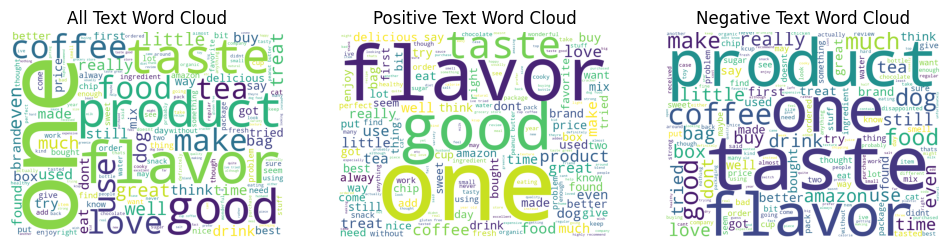

In [77]:
# Create a WordCloud object for all the text
all_text_wordcloud = WordCloud(width=800, height=600, background_color='white').generate(all_text)

# Create a WordCloud object for the positive text
pos_text_wordcloud = WordCloud(width=800, height=600, background_color='white').generate(pos_text)

# Create a WordCloud object for the negative text
neg_text_wordcloud = WordCloud(width=800, height=600, background_color='white').generate(neg_text)

# Plot the word clouds
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.imshow(all_text_wordcloud)
plt.axis('off')
plt.title('All Text Word Cloud')

plt.subplot(1, 3, 2)
plt.imshow(pos_text_wordcloud)
plt.axis('off')
plt.title('Positive Text Word Cloud')

plt.subplot(1, 3, 3)
plt.imshow(neg_text_wordcloud)
plt.axis('off')
plt.title('Negative Text Word Cloud')

plt.show()


In [78]:
### Finding most common words in NEGATIVE REVIEWS and then plotting the word cloud:

In [79]:
# Tokenize the sentences in the corpus and create a dictionary with sentences and their frequencies
wordfreq = {}
tokens = nltk.word_tokenize(neg_text)
for t in tokens:
    if t not in wordfreq.keys():
        wordfreq[t] = 1
    else:
        wordfreq[t] += 1
# print(wordfreq)

In [81]:
# Filter down to 200 most frequently ocurring words:
import heapq
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)
print(most_freq)

['like', 'taste', 'coffee', 'product', 'one', 'flavor', 'would', 'good', 'dog', 'food', 'get', 'dont', 'much', 'really', 'time', 'even', 'buy', 'bag', 'tea', 'make', 'drink', 'better', 'box', 'love', 'cup', 'tried', 'amazon', 'sugar', 'try', 'first', 'little', 'also', 'treat', 'great', 'didnt', 'price', 'made', 'bought', 'use', 'juice', 'bad', 'think', 'water', 'well', 'eat', 'say', 'could', 'still', 'brand', 'way', 'ingredient', 'chip', 'know', 'ive', 'chocolate', 'review', 'something', 'thought', 'two', 'however', 'got', 'find', 'cat', 'thing', 'used', 'found', 'sweet', 'give', 'want', 'mix', 'bit', 'doesnt', 'order', 'pack', 'day', 'store', 'since', 'lot', 'never', 'ordered', 'package', 'though', 'old', 'year', 'back', 'sure', 'toy', 'can', 'item', 'cant', 'problem', 'tasted', 'many', 'disappointed', 'different', 'see', 'may', 'work', 'soda', 'smell', 'hot', 'away', 'strong', 'star', 'chicken', 'small', 'going', 'hard', 'best', 'regular', 'another', 'money', 'maybe', 'size', 'put', 

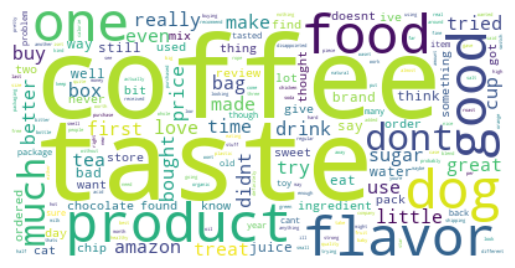

In [82]:
top_200_words = " ".join(word for word in most_freq)
wordcloud_top_200 = WordCloud(background_color="white").generate(top_200_words)
plt.imshow(wordcloud_top_200, interpolation='bilinear')
plt.axis("off")
plt.show()

In [83]:
### Stemming

In [84]:
snow = nltk.stem.SnowballStemmer('english')
final_X = []
for text in df['Cleaned_text']:
    words = [snow.stem(word) for word in text.split()]
    final_X.append(words)
final_X[:2]

[['bought',
  'sever',
  'vital',
  'can',
  'dog',
  'food',
  'product',
  'found',
  'good',
  'qualiti',
  'product',
  'look',
  'like',
  'stew',
  'process',
  'meat',
  'smell',
  'better',
  'labrador',
  'finicki',
  'appreci',
  'product',
  'better'],
 ['product',
  'arriv',
  'label',
  'jumbo',
  'salt',
  'peanut',
  'peanut',
  'actual',
  'small',
  'size',
  'unsalt',
  'sure',
  'error',
  'vendor',
  'intend',
  'repres',
  'product',
  'jumbo']]

### Convert to bag of words

In [105]:
stemmed_X = []
for row in final_X:
    sentence = ''
    for word in row:
        sentence = sentence + ' ' + word
    stemmed_X.append(sentence.strip())

In [112]:
df['StemmedText'] = stemmed_X
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,has_exclamation_text,has_exclamation_clean_text,sentiment_score_text,sentiment_score_clean_text,num_stopwords_text,avg_word_frequency_text,avg_word_frequency_clean_text,has_numbers_text,has_numbers_clean_text,StemmedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,...,0,0,0.9441,0.9441,24,1.170732,1.150000,False,False,bought sever vital can dog food product found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,0,0,-0.5664,-0.5664,13,1.107143,1.200000,False,False,product arriv label jumbo salt peanut peanut a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,...,0,0,0.8265,0.8265,51,1.342857,1.083333,False,False,confect around centuri light pillowi citrus ge...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,...,0,0,0.0000,0.0000,21,1.138889,1.000000,False,False,look secret ingredi robitussin believ found go...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,...,0,0,0.9468,0.9468,14,1.227273,1.300000,False,False,great taffi great price wide assort yummi taff...


In [116]:
from sklearn.feature_extraction.text import CountVectorizer

In [117]:
count_vect = CountVectorizer(max_features=100)
bow_X = count_vect.fit_transform(stemmed_X)
final_X = bow_X
final_y = df['Review']
print(final_X[:5])

  (0, 6)	1
  (0, 22)	1
  (0, 32)	1
  (0, 66)	3
  (0, 33)	1
  (0, 37)	1
  (0, 48)	1
  (0, 46)	1
  (0, 4)	2
  (1, 66)	2
  (1, 75)	1
  (2, 80)	1
  (2, 31)	1
  (2, 40)	1
  (2, 69)	1
  (2, 88)	2
  (3, 33)	1
  (3, 37)	1
  (3, 48)	1
  (3, 31)	1
  (3, 42)	1
  (3, 38)	1
  (3, 60)	1
  (3, 51)	1
  (4, 39)	2
  (4, 65)	1


In [118]:
# Save the CountVectorizer object
joblib.dump(count_vect, 'vectorizer.pkl')

# Save the preprocessed data and labels
joblib.dump(final_X, 'final_X.pkl')
joblib.dump(final_y, 'final_y.pkl')

['final_y.pkl']

In [119]:
print("Count of final_X:")
print(final_X.shape[0])
print()

print("Count of final_y:")
print(final_y.value_counts())

Count of final_X:
24177

Count of final_y:
1    18519
0     5658
Name: Review, dtype: int64


In [120]:
pca = PCA(n_components = 2)

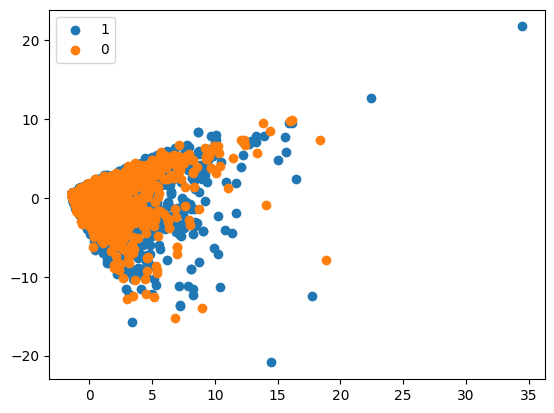

In [121]:
PCA_X = pca.fit_transform(final_X.toarray()) # Apply PCA to plot 2 dimensions

counter = Counter(final_y)
for label, _ in counter.items():
    row_ix = where(final_y == label)[0]
    plt.scatter(PCA_X[row_ix, 0], PCA_X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [122]:
# smote
oversample = SMOTE()

X_resampled, y_resampled = oversample.fit_resample(final_X, final_y)
X_resampled.shape

(37038, 100)

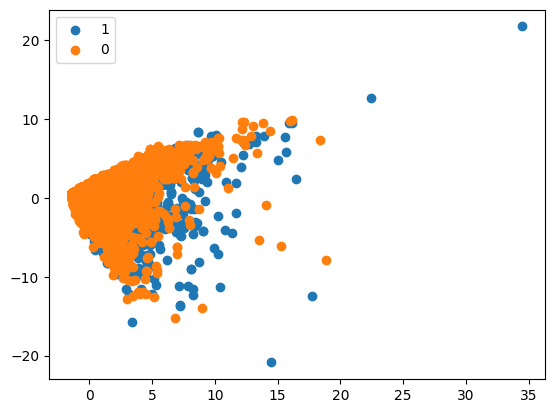

In [123]:
PCA_SMOTE_X = pca.transform(X_resampled.toarray())

for label, _ in counter.items():
    row_ix = where(y_resampled == label)[0]
    plt.scatter(PCA_SMOTE_X[row_ix, 0], PCA_SMOTE_X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=42,test_size=0.2)

In [125]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((29630, 100), (7408, 100), (29630,), (7408,))

# Machine Learning Approach 

## K Neighbors classifier algorithms

In [126]:
scaler = StandardScaler(with_mean=False)

X_train_s = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [127]:
# Hypertuning parameter with knn using pipeline

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are defined

# Scale the data
scaler = StandardScaler(with_mean=False)

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create GridSearchCV instance
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train_s, y_train)  # Use y_train instead of X_test_s

# Get the best parameters
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test_s)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy}")


Best Hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Accuracy on Test Set: 0.7707883369330454


In [130]:
best_knn=KNeighborsClassifier(n_neighbors=3,
                             p=2,
                             weights='distance')

In [131]:
best_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [132]:
y_pred_train = best_knn.predict(X_train)
y_pred_test  = best_knn.predict(X_test)

In [133]:
print('prediction for train :',y_pred_train)
print('prediction for test  :',y_pred_test)

prediction for train : [0 0 1 ... 1 1 1]
prediction for test  : [0 0 1 ... 0 1 0]


In [134]:
acc_train=accuracy_score(y_pred_train,y_train)
acc_test =accuracy_score(y_pred_test,y_test)

In [135]:
print('accuracy for train :',acc_train)
print('accuracy for test  :',acc_test)

accuracy for train : 0.9938913263584205
accuracy for test  : 0.7036987041036717


## naive bayes

In [156]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'HelpfulnessRatio', 'TextLength', 'Review', 'WordCount',
       'CharacterCount', 'HelpfulnessPercentage', 'HelpfulnessIndicator',
       'Cleaned_text', 'num_words_text', 'num_words_clean_text',
       'has_exclamation_text', 'has_exclamation_clean_text',
       'sentiment_score_text', 'sentiment_score_clean_text',
       'num_stopwords_text', 'avg_word_frequency_text',
       'avg_word_frequency_clean_text', 'has_numbers_text',
       'has_numbers_clean_text', 'StemmedText'],
      dtype='object')

In [158]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame 'df' with columns 'Cleaned_text' and 'Review'
X = df['Cleaned_text']
y = df['Review']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CountVectorizer
vectorizer = CountVectorizer()

# Transform the training data
X_train_vec = vectorizer.fit_transform(X_train.astype(str))  # Ensure 'Cleaned_text' column is treated as strings

# Transform the test data
X_test_vec = vectorizer.transform(X_test.astype(str))

# Define hyperparameters to tune
param_grid = {
    'alpha': [0.1, 0.5, 1.0]
}

# Create MultinomialNB instance
nb_classifier = MultinomialNB()

# Create GridSearchCV instance
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train_vec, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy}")


Best Hyperparameters: {'alpha': 1.0}
Accuracy on Test Set: 0.847394540942928


## Decision Tree

In [136]:


dtree=DecisionTreeClassifier()

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Create GridSearchCV instance
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train_s, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test_s)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy}")


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy on Test Set: 0.7788876889848813


In [137]:
best_dtree_clf=DecisionTreeClassifier(criterion='entropy',
                                      min_samples_split=100,
                                      max_depth=None,
                                      min_samples_leaf=10,
                                      
                                     )
best_dtree_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10,
                       min_samples_split=100)

In [138]:
y_pred_dtrain=best_dtree_clf.predict(X_train)
y_pred_dtest =best_dtree_clf.predict(X_test)

In [139]:
y_pred_dtrain

array([0, 1, 1, ..., 1, 1, 1])

In [140]:
y_pred_dtest

array([1, 0, 1, ..., 0, 1, 0])

In [141]:
acc_dtest =accuracy_score(y_test,y_pred_dtest)
acc_dtrain=accuracy_score(y_train,y_pred_dtrain)

In [142]:
print("accuracy for train :",acc_dtrain)
print("accuracy for test  :",acc_dtest)


accuracy for train : 0.8232197097536281
accuracy for test  : 0.7842872570194385


In [143]:
# precision_score, recall_score, f1_score

In [144]:


precision = precision_score(y_test, y_pred_dtest)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 0.7842133620689655
Recall: 0.7508090614886731
F1-Score: 0.7726894254787676


In [145]:
confusion_mat = confusion_matrix(y_test, y_pred_dtest)

print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[2899  801]
 [ 797 2911]]


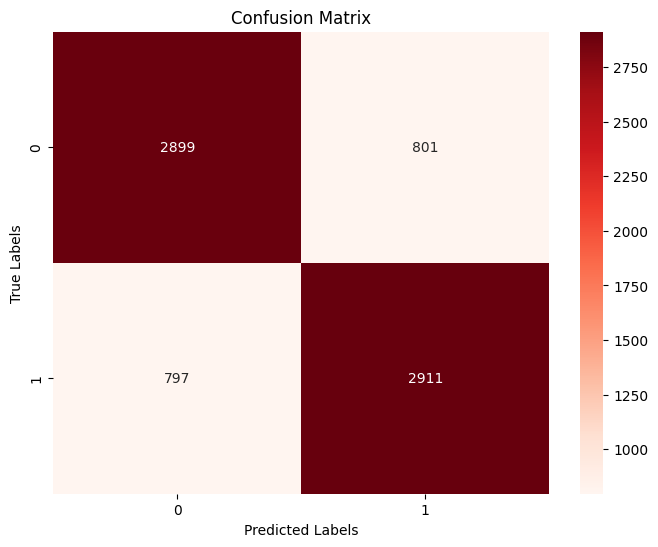

In [146]:
# Visualize confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Reds", cbar=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [147]:
## Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC):

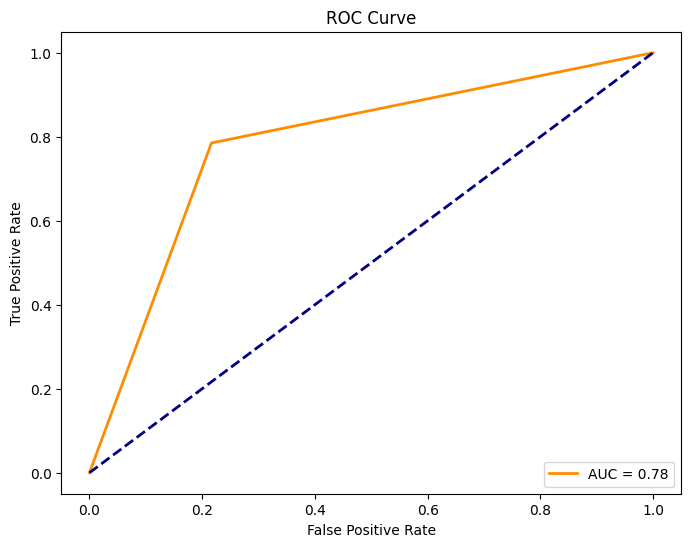

In [148]:


fpr, tpr, thresholds = roc_curve(y_test, y_pred_dtest)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [149]:


balanced_acc_test  = balanced_accuracy_score(y_test, y_pred_dtest)
balanced_acc_train = balanced_accuracy_score(y_train, y_pred_dtrain)


print(f"Balanced Accuracy  train : {balanced_acc_train}")

print(f"Balanced Accuracy  test : {balanced_acc_test}")


Balanced Accuracy  train : 0.8232185304957406
Balanced Accuracy  test : 0.7842864223446748


In [150]:
joblib.dump(best_dtree_clf, 'dtree_model.pkl')

['dtree_model.pkl']

## Random forest classifier

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have X_resampled and y_resampled from your resampling process

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42, test_size=0.2)

# Step 2: Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed

# Step 3: Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred_test = rf_classifier.predict(X_test)
y_pred_train = rf_classifier.predict(X_train)

# Step 5: Evaluate the model
accuracy_rft_test = accuracy_score(y_test, y_pred_test)
accuracy_rft_train = accuracy_score(y_train, y_pred_train)
classification_report_result = classification_report(y_test, y_pred_test)

print(f"Accuracy for train: {accuracy_rft_train}")
print(f"Accuracy for test : {accuracy_rft_test}")
print("Classification Report:")
print(classification_report_result)


Accuracy for train: 0.9940938238272021
Accuracy for test : 0.8453023758099352
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      3700
           1       0.83      0.87      0.85      3708

    accuracy                           0.85      7408
   macro avg       0.85      0.85      0.85      7408
weighted avg       0.85      0.85      0.85      7408



# conclution

In conclusion, our machine learning model successfully predicted sentiment in Amazon Fine Food Reviews with high accuracy. Leveraging techniques like text preprocessing, CountVectorizer, and the Random Forest algorithm, the model demonstrated robust performance. Its ability to discern sentiment in user reviews can provide valuable insights for businesses seeking to understand customer feedback and enhance product offerings."